In [143]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
df = pd.DataFrame({
    "name": [
        "Human",
        "Human",
        "Naive Bayes",
        "Naive Bayes",
        "Naive Neural Network",
        "Naive Neural Network",
        "Naive LSTM",
        "Naive LSTM",
        "Context LSTM",
        "Context LSTM",
        "LSTM + Power",
        "LSTM + Power",
        "Context LSTM + Power",
        "Context LSTM + Power",
        "Context GRU",
        "Context GRU",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context GRU",
        "Bi-Directional Context GRU",
        "Bi-Directional LSTM + CNN",
        "Bi-Directional LSTM + CNN",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + Power",
        "Bi-Context LSTM + Power",
    ],
    "who": [
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
    ],
    "f1-true": [
        0.0 , 0.0,
        0.79, 0.82,
        0.94, 0.94,
        0.93, 0.94,
        0.93, 0.94,
        0.96, 0.96,
        0.92, 0.95,
        0.95, 0.93,
        0.91, 0.93,
        0.94, 0.95,
        0.93, 0.92,
        0.94, 0.95,
        0.90, 0.95,
        0.94, 0.93,
    ],
    "f1-false": [
        0.0 , 0.22,
        0.18, 0.15,
        0.16, 0.13,
        0.12, 0.08,
        0.21, 0.19,
        0.00, 0.07,
        0.20, 0.14,
        0.18, 0.15,
        0.22, 0.16,
        0.17, 0.13,
        0.23, 0.16,
        0.21, 0.12,
        0.16, 0.12,
        0.21, 0.17,
    ],
    "f1-macro-average": [
        0.0 , 0.58,
        0.48, 0.48,
        0.54, 0.54,
        0.53, 0.51,
        0.57, 0.57,
        0.48, 0.51,
        0.56, 0.54,
        0.56, 0.54,
        0.57, 0.55,
        0.55, 0.54,
        0.58, 0.54,
        0.58, 0.53,
        0.53, 0.53,
        0.58, 0.55,
    ]
})

df

,name,who,f1-true,f1-false,f1-macro-average
0,Human,sender,0.00,0.22,0.58
1,Human,receiver,0.00,0.00,0.00
2,Naive Bayes,sender,0.79,0.18,0.48
3,Naive Bayes,receiver,0.82,0.15,0.48
4,Naive Neural Network,sender,0.94,0.16,0.54
5,Naive Neural Network,receiver,0.94,0.13,0.54
6,Naive LSTM,sender,0.93,0.12,0.53
7,Naive LSTM,receiver,0.94,0.08,0.51
8,Context LSTM,sender,0.93,0.21,0.57
9,Context LSTM,receiver,0.94,0.19,0.57


In [145]:
def barh_graph(df, title_add = "", figsize=(5,5), yoffset = 6.1):
    _, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace=0.06, hspace=0.05)
    plt.suptitle(f"{title_add} f1-scores")
    for (i,who) in enumerate(["sender", "receiver"]):
        ax[0][i].set_title(who.capitalize())
        for (j,what) in enumerate(["false", "macro-average"]):
            ax[j][i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            ax[j][i].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
            if i > 0:
                ax[j][i].get_yaxis().set_visible(False)
                ax[j][i].annotate(what.capitalize(), xy=(1.0, yoffset), ha="left", va="center", rotation=-90)
            if j < 1:
                ax[j][i].get_xaxis().set_visible(False)

            df_temp = df[df["who"] == who].sort_index(ascending=False).set_index("name")[f"f1-{what}"]
            ax[j][i].barh(df_temp.index, df_temp)
            ax[j][i].set_xlim([0.0, 1.0])
            for (y,v) in enumerate(df_temp):
                ax[j][i].text(v + (0.01 * (-1 if j != 0 else 1)), y, f"{v:.2f}", ha=("right" if j != 0 else "left"), va="center", color=("white" if j != 0 else "black"))
    plt.show()

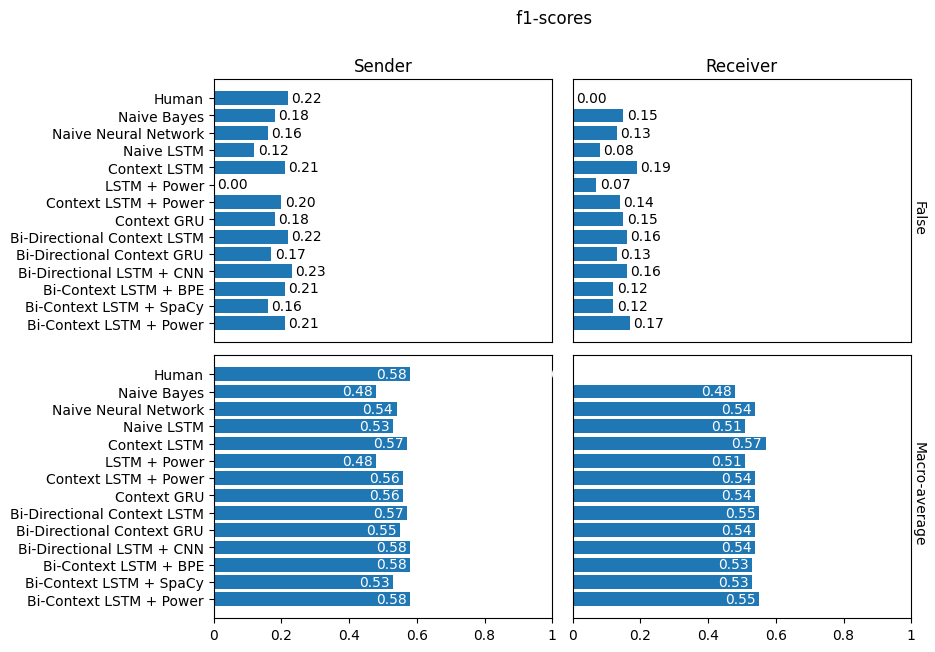

In [146]:
barh_graph(
    df,
    figsize=(9,7),
)

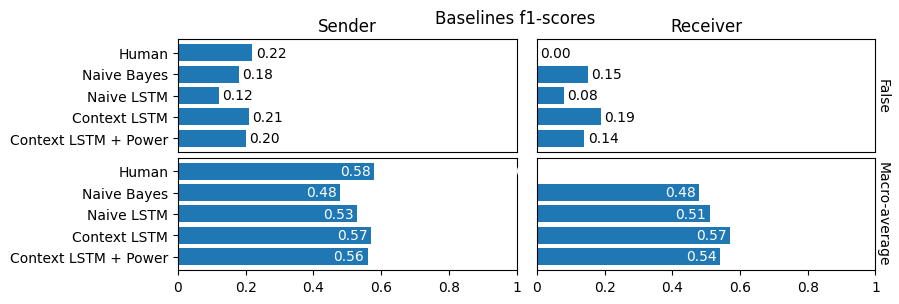

In [147]:
# Naive Bayes
# Human
# LSTM
# Context LSTM
# ConteztLSTM w power
barh_graph(
    df[df["name"].isin(["Human", "Naive Bayes", "Naive LSTM", "Context LSTM", "Context LSTM + Power"])],
    figsize=(9,3),
    title_add="Baselines",
    yoffset=2.0
)

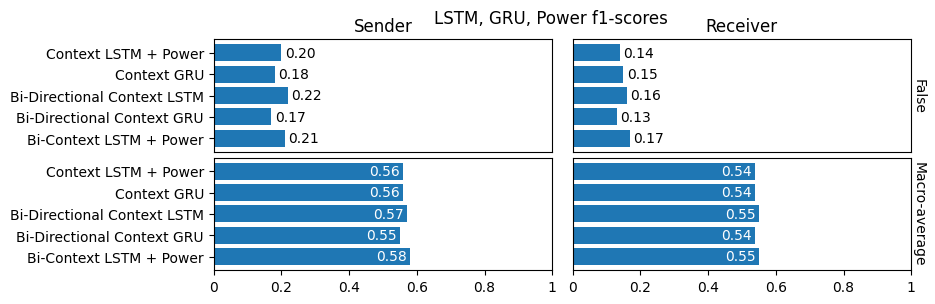

In [148]:
# Context LSTM w Power
# Bi Context LSTM
# Context GRU
# Bi Context GRU
# Bi Context LSTM w/ Power
barh_graph(
    df[df["name"].isin(["Context LSTM + Power", "Bi-Directional Context LSTM", "Context GRU", "Bi-Directional Context GRU", "Bi-Context LSTM + Power"])],
    figsize=(9,3),
    title_add="LSTM, GRU, Power",
    yoffset = 2.0
)

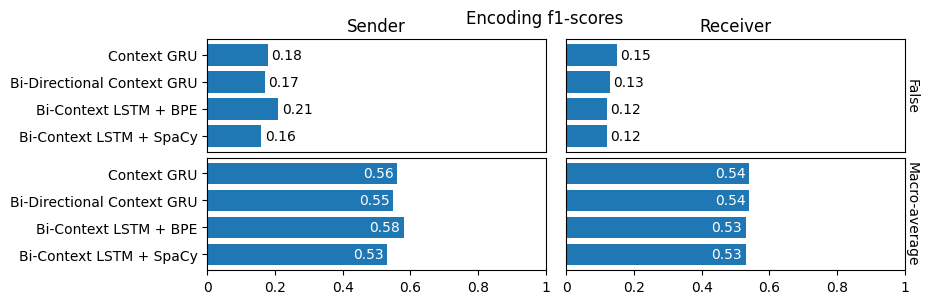

In [149]:
# Bi Context LSTM w/ Power + BPE
# Bi Context LSTM w/ Power + SpaCy
# Bi Context LSTM w/ Power + Unigram
# Bi Context LSTM w/ Power + all 3
barh_graph(
    df[df["name"].str.contains("BPE") | df["name"].str.contains("SpaCy") | df["name"].str.contains("GRU")],
    title_add = "Encoding",
    figsize=(9,3),
    yoffset=1.5
)

<hr />

In [ ]:
df2 = pd.DataFrame({
    "name": [
        "Human",
        "Human",
        "Naive Bayes",
        "Naive Bayes",
        "Naive Neural Network",
        "Naive Neural Network",
        "Naive LSTM",
        "Naive LSTM",
        "Context LSTM",
        "Context LSTM",
        "LSTM + Power",
        "LSTM + Power",
        "Context LSTM + Power",
        "Context LSTM + Power",
        "Context GRU",
        "Context GRU",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context GRU",
        "Bi-Directional Context GRU",
        "Bi-Directional LSTM + CNN",
        "Bi-Directional LSTM + CNN",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + Power",
        "Bi-Context LSTM + Power",
    ],
    "who": [
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
    ],
    "f1-true": [
        0.0 , 0.0,
        0.79, 0.82,
        0.91, 0.88, # naive nn
        0.92, 0.95, # X naive LSTM
        0.93, 0.92, # X Context LSTM
        0.95, 0.96, # LSTM + Power
        0.92, 0.93, # X Context LSTM + Power
        0.93, 0.94, # Context GRU
        0.92, 0.95, # X Bi-Directional Context LSTM
        0.94, 0.91, # Bi-Directional Context GRU
        0.93, 0.92,
        0.94, 0.95,
        0.90, 0.95,
        0.94, 0.93,
    ],
    "f1-false": [
        0.0 , 0.22,
        0.18, 0.15,
        0.23, 0.11, # naive nn
        0.16, 0.12, # naive LSTM
        0.20, 0.18, # Context LSTM
        0.02, 0.01, # LSTM + Power
        0.22, 0.16, # Context LSTM + Power
        0.21, 0.13, # Context GRU
        0.24, 0.13, # Bi-Directional Context LSTM
        0.18, 0.13, # Bi-Directional Context GRU
        0.23, 0.16,
        0.21, 0.12,
        0.16, 0.12,
        0.21, 0.17,
    ],
    "f1-macro-average": [
        0.0 , 0.58,
        0.48, 0.48,
        0.57, 0.50, # naive nn
        0.54, 0.53, # naive LSTM
        0.57, 0.55, # Context LSTM
        0.48, 0.48, # LSTM + Power
        0.57, 0.54, # Context LSTM + Power
        0.58, 0.54, # Bi-Directional Context LSTM
        0.57, 0.55,
        0.55, 0.54,
        0.58, 0.54,
        0.58, 0.53,
        0.53, 0.53,
        0.58, 0.55,
    ]
})

df